# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Acknowledgement

This lab is imported from prof. Christopher Musco's 2024 iteration of CS-GY 6923. Thanks Chris!

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [ ]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv('/content/AmesHousing.csv')

Display the first six rows of the data frame

In [ ]:
# TODO
# TODO
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [ ]:
num_samples, num_attributes = df.shape
print(f"num samples={num_samples}, num attributes={num_attributes}")

num samples=2930, num attributes=15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [ ]:
# TODO
df = df.dropna()


Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [ ]:
# TODO
# y = ...
y = df['SalePrice'].to_numpy()
y.shape
print(type(y))

<class 'numpy.ndarray'>


Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [ ]:
mean_house = np.mean(y)
above_120 = np.mean(y > 120)
print(f"Mean house price (in $1000s): {mean_house:.2f}")
print(f"Fraction of homes above $120k: {above_120:.3f}")


Mean house price (in $1000s): 180.84
Fraction of homes above $120k: 0.817


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [ ]:
x = df['TotRms AbvGrd'].to_numpy()
print(type(x))


<class 'pandas.core.series.Series'>


Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

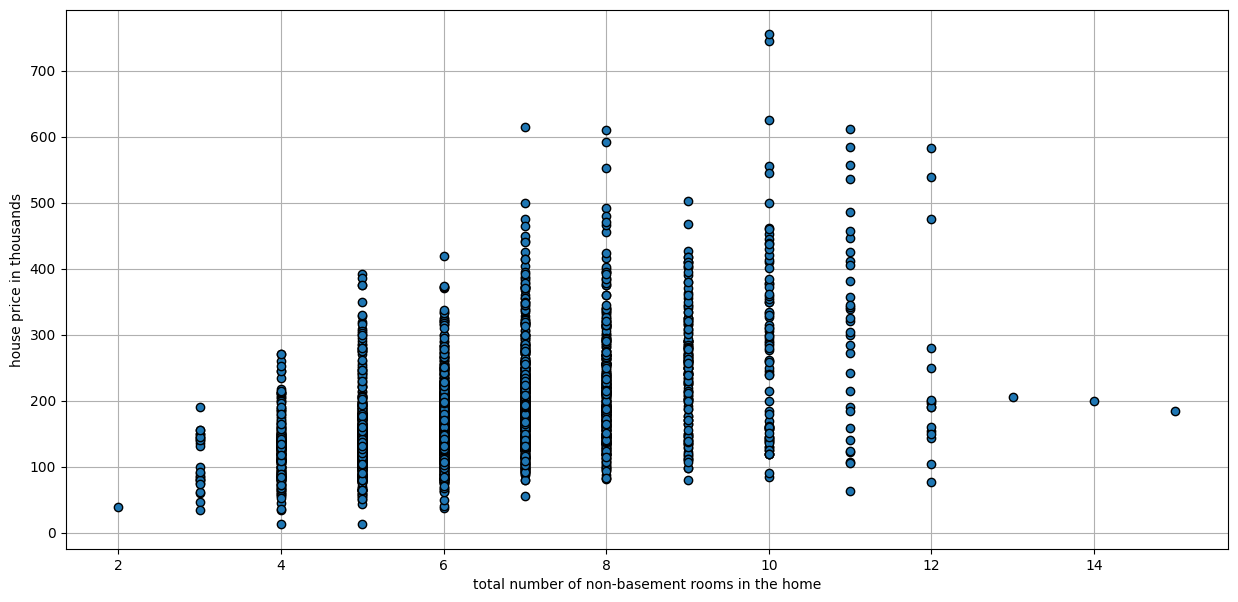

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(x,y,'o', mec="k")
plt.xlabel('total number of non-basement rooms in the home')
plt.ylabel('house price in thousands')
plt.grid(True)


## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [ ]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    beta1 = numerator / denominator
    beta0 = y_mean - beta1 * x_mean

    predictions = beta0 + beta1 * x
    loss = np.sum((y - predictions)**2)


    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [ ]:
beta0, beta1, loss = fit_linear(x, y)

print(f"beta0 = {beta0:.3f}")
print(f"beta1 = {beta1:.3f}")
print(f"Squared loss = {loss:.2f}")


beta0 = 18.781
beta1 = 25.149
Squared loss = 14101634.93


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

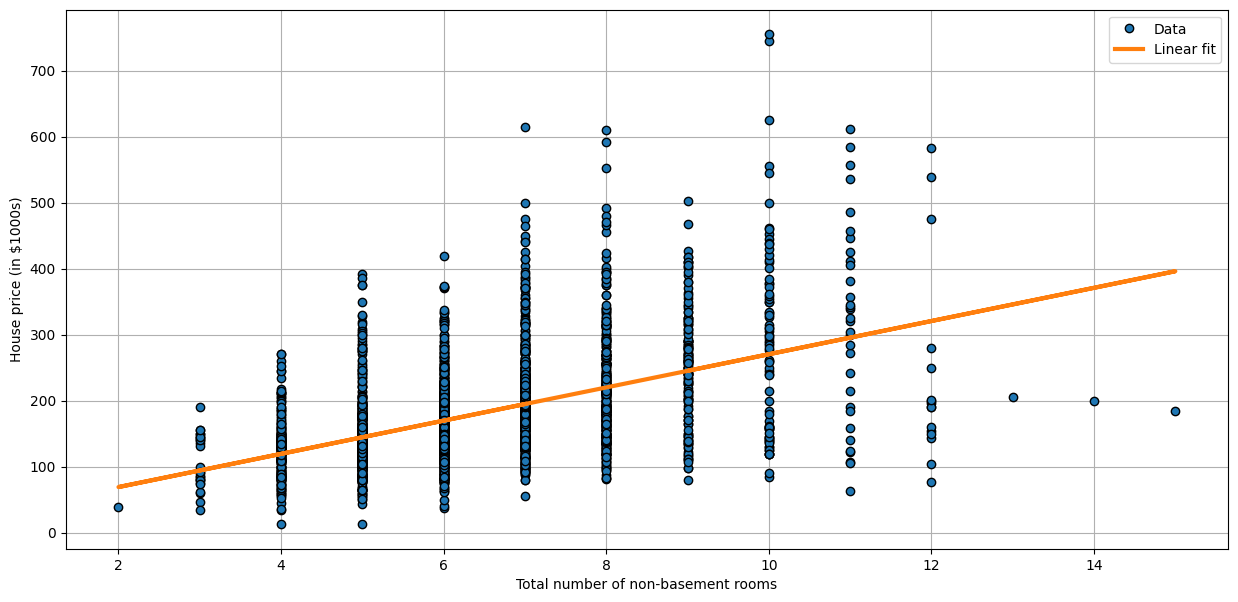

In [ ]:
yp = beta1*x + beta0
plt.figure(figsize=(15,7))

plt.plot(x, y, 'o', mec='k', label='Data')
plt.plot(x, yp, '-', linewidth=3, label='Linear fit')

plt.xlabel('Total number of non-basement rooms')
plt.ylabel('House price (in $1000s)')
plt.grid(True)
plt.legend()
plt.show()



# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [ ]:
predictors = [col for col in df.columns if col != "SalePrice"]
res = []

for col in predictors:
  x = df[col].to_numpy()

  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean)**2)

  beta1 = numerator / denominator
  beta0 = y_mean - beta1 * x_mean

  predictions = beta0 + beta1 * x
  loss = np.sum((y - predictions)**2)

  res.append((col, loss))

print("Attribute           Squared Loss")
print("--------------------------------")

for col, loss in res:
    print(f"{col:18s} {loss:10.2f}")

best_predictor = min(res, key=lambda x: x[1])

print("--------------------------------")

print(f" Best predictor is {best_predictor[0]}")


Attribute           Squared Loss
--------------------------------
Lot Area           17355552.13
Year Built         12857597.52
Bsmt Unf SF        18057043.35
Total Bsmt SF      11213377.81
1st Flr SF         11463538.46
2nd Flr SF         17325635.37
Gr Liv Area        9349292.71
Full Bath          13120702.49
Half Bath          17166315.15
Bedroom AbvGr      18296281.04
TotRms AbvGrd      14101634.93
Fireplaces         14478395.13
Garage Cars        10843473.27
Garage Area        11022825.04
--------------------------------
 Best predictor is Gr Liv Area


**TODO:** Describe in words the meaning of the most predictive variable for housing price.

The most predictive variable for housing price is Overall Quality because it reflects the construction quality and finish of the home. Buyers also strong value build quality.

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [ ]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)


    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf


    for b0 in beta0_range:
        for b1 in beta1_range:
            predictions = b0 + b1 * x
            loss = np.sum((y - predictions) ** 2)

            if loss < min_loss:
                min_loss = loss
                best_beta0 = b0
                best_beta1 = b1

    beta0 = best_beta0
    beta1 = best_beta1

    return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

In [ ]:
x_area = df['Gr Liv Area'].values


beta0_exact, beta1_exact, loss_exact = fit_linear(x_area, y)
print("Exact Method (Closed Form):")
print(f"  beta0 = {beta0_exact:.4f}")
print(f"  beta1 = {beta1_exact:.4f}")
print(f"  loss = {loss_exact:.2f}")

beta0_approx, beta1_approx, loss_approx = fit_approx(x_area, y)
print("\nApproximate Method (Brute Force):")
print(f"  beta0 = {beta0_approx:.4f}")
print(f"  beta1 = {beta1_approx:.4f}")
print(f"  loss = {loss_approx:.2f}")

print(f"\nDifference in loss: {abs(loss_exact - loss_approx):.2f}")



Exact Method (Closed Form):
  beta0 = 13.3219
  beta1 = 0.1117
  loss = 9349292.71

Approximate Method (Brute Force):
  beta0 = 15.9000
  beta1 = 0.1100
  loss = 9351446.56

Difference in loss: 2153.85


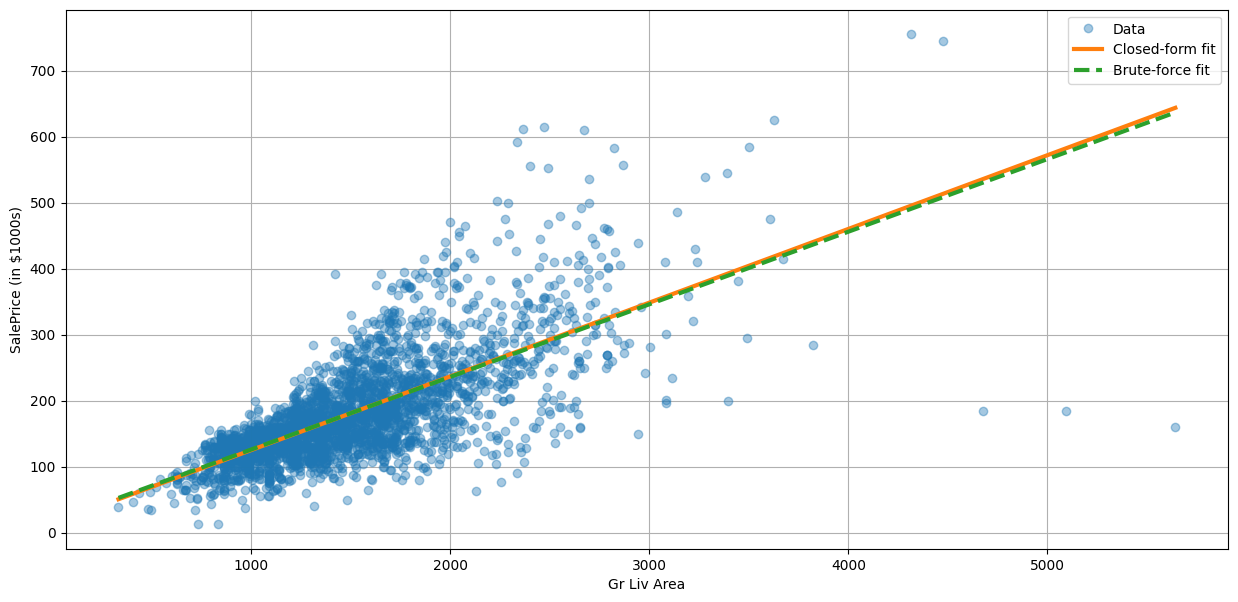

In [ ]:

y_hat_exact = beta0_exact + beta1_exact * x_area
y_hat_approx = beta0_approx + beta1_approx * x_area
idx = np.argsort(x_area)

plt.figure(figsize=(15,7))
plt.plot(x_area, y, 'o', alpha=0.4, label='Data')
plt.plot(x_area[idx], y_hat_exact[idx],
         linewidth=3, label='Closed-form fit')
plt.plot(x_area[idx], y_hat_approx[idx],
         '--', linewidth=3, label='Brute-force fit')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice (in $1000s)')
plt.grid(True)
plt.legend()
plt.show()


## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [ ]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """
    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)


    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf


    for b0 in beta0_range:
        for b1 in beta1_range:
            predictions = b0 + b1 * x
            loss = np.sum(np.abs(y-predictions))

            if loss < min_loss:
                min_loss = loss
                best_beta0 = b0
                best_beta1 = b1

    beta0 = best_beta0
    beta1 = best_beta1

    return beta0, beta1, min_loss



In [ ]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...

    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)


    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf


    for b0 in beta0_range:
        for b1 in beta1_range:
            predictions = b0 + b1 * x
            loss = np.max(np.abs(y-predictions))

            if loss < min_loss:
                min_loss = loss
                best_beta0 = b0
                best_beta1 = b1

    beta0 = best_beta0
    beta1 = best_beta1

    return beta0, beta1, min_loss

    return beta0, beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

L2 (squared) loss: 9.35e+06  beta0=13.3219, beta1=0.111695
L1 loss:          1.12e+05  beta0=20.3000, beta1=0.105000
L∞ loss:          3.65e+02  beta0=45.6000, beta1=0.085000


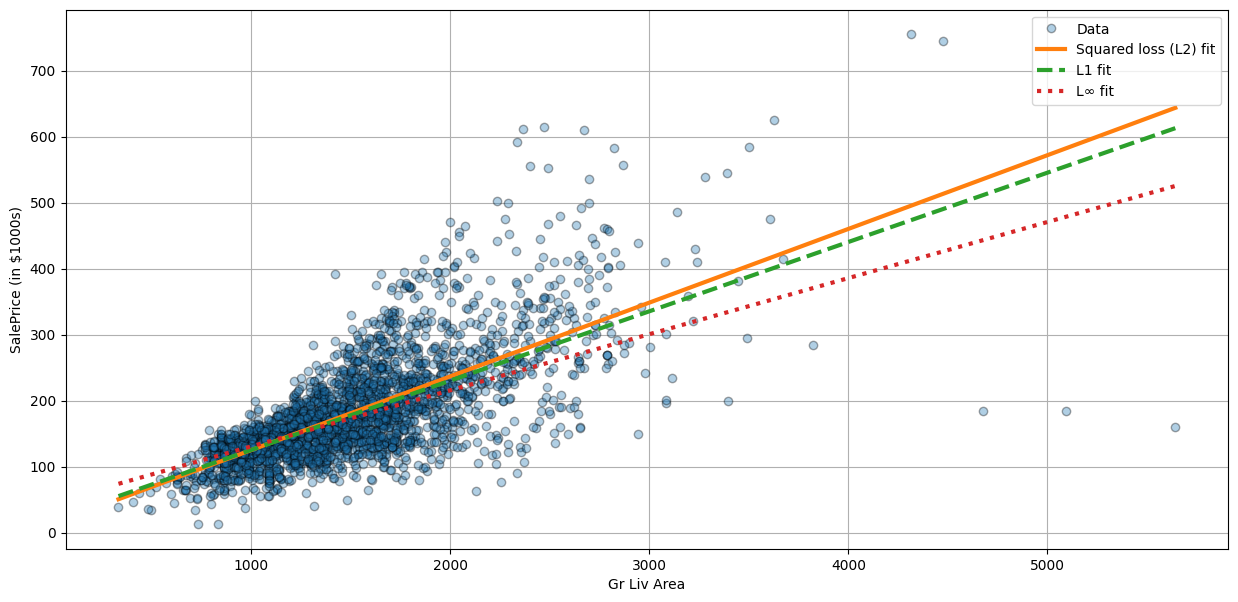

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df['Gr Liv Area'].to_numpy()
y = df['SalePrice'].to_numpy()


beta0_l2, beta1_l2, loss_l2 = fit_linear(x, y)
beta0_l1, beta1_l1, loss_l1 = fit_approx_l1(x, y)
beta0_inf, beta1_inf, loss_inf = fit_approx_max(x, y)

print(f"L2 (squared) loss: {loss_l2:.2e}  beta0={beta0_l2:.4f}, beta1={beta1_l2:.6f}")
print(f"L1 loss:          {loss_l1:.2e}  beta0={beta0_l1:.4f}, beta1={beta1_l1:.6f}")
print(f"L∞ loss:          {loss_inf:.2e}  beta0={beta0_inf:.4f}, beta1={beta1_inf:.6f}")


idx = np.argsort(x)

yhat_l2  = beta0_l2  + beta1_l2  * x
yhat_l1  = beta0_l1  + beta1_l1  * x
yhat_inf = beta0_inf + beta1_inf * x


plt.figure(figsize=(15,7))

plt.plot(x, y, 'o', alpha=0.35, mec='k', label='Data')

plt.plot(x[idx], yhat_l2[idx],  linewidth=3, label='Squared loss (L2) fit')
plt.plot(x[idx], yhat_l1[idx],  '--', linewidth=3, label='L1 fit')
plt.plot(x[idx], yhat_inf[idx], ':', linewidth=3, label='L∞ fit')

plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice (in $1000s)' if y.max() < 1000 else 'SalePrice')
plt.grid(True)
plt.legend()
plt.show()


**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

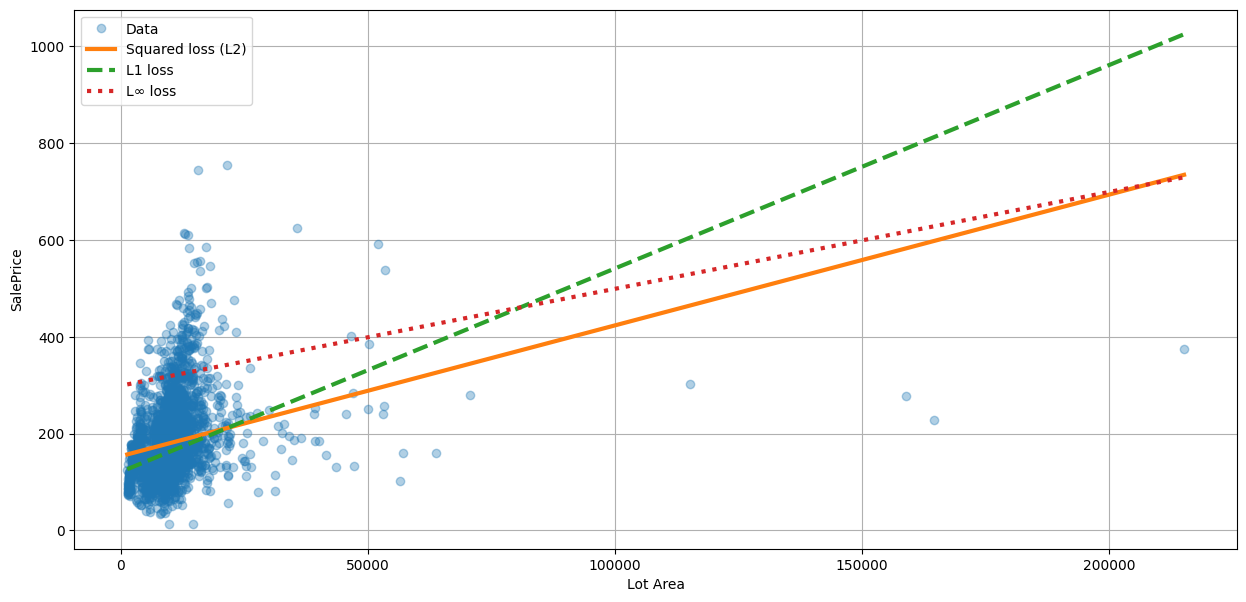

In [ ]:
x = df['Lot Area'].to_numpy()
y = df['SalePrice'].to_numpy()

def fit_approx_l1_lot(x, y):
    beta0_range = np.arange(-100, 300, 1)
    beta1_range = np.arange(-0.01, 0.01, 0.0001)

    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf

    for b0 in beta0_range:
        for b1 in beta1_range:
            preds = b0 + b1 * x
            loss = np.sum(np.abs(y - preds))
            if loss < min_loss:
                min_loss = loss
                best_beta0 = b0
                best_beta1 = b1

    return best_beta0, best_beta1, min_loss


def fit_approx_max_lot(x, y):
    beta0_range = np.arange(-100, 300, 1)
    beta1_range = np.arange(-0.01, 0.01, 0.0001)

    best_beta0 = 0
    best_beta1 = 0
    min_loss = np.inf

    for b0 in beta0_range:
        for b1 in beta1_range:
            preds = b0 + b1 * x
            loss = np.max(np.abs(y - preds))
            if loss < min_loss:
                min_loss = loss
                best_beta0 = b0
                best_beta1 = b1

    return best_beta0, best_beta1, min_loss


beta0_l2, beta1_l2, _ = fit_linear(x, y)
beta0_l1, beta1_l1, _ = fit_approx_l1_lot(x, y)
beta0_inf, beta1_inf, _ = fit_approx_max_lot(x, y)

idx = np.argsort(x)

yhat_l2  = beta0_l2  + beta1_l2  * x
yhat_l1  = beta0_l1  + beta1_l1  * x
yhat_inf = beta0_inf + beta1_inf * x

plt.figure(figsize=(15,7))

plt.plot(x, y, 'o', alpha=0.35, label='Data')

plt.plot(x[idx], yhat_l2[idx],  linewidth=3, label='Squared loss (L2)')
plt.plot(x[idx], yhat_l1[idx],  '--', linewidth=3, label='L1 loss')
plt.plot(x[idx], yhat_inf[idx], ':', linewidth=3, label='L∞ loss')

plt.xlabel('Lot Area')
plt.ylabel('SalePrice')
plt.grid(True)
plt.legend()
plt.show()




```
With Lot Area as the predictor, squared loss is heavily influenced by extreme outliers and produces a steeper fit. In contrast, ℓ1 and ℓ∞ losses are more robust, with ℓ1 fitting the majority of homes better and ℓ∞ prioritizing limiting the worst prediction error.
```

